Checks whether the folder and file structure is identical across the following colormapped directories:

- `magama_coloremapped_8bit_depth_images`
- `plasma_coloremapped_8bit_depth_images`
- `viridis_coloremapped_8bit_depth_images`
- `mini_dataset`

For each directory, the code lists all files and compares them to a baseline (`mini_dataset`).  
If there are any differences in file names or missing files between the directories, the code will print out the discrepancies.

In [ ]:
import os
folders = [
    'magama_coloremapped_8bit_depth_images',
    'plasma_coloremapped_8bit_depth_images',
    'viridis_coloremapped_8bit_depth_images',
    'mini_dataset'
]

# Get the list of files in each folder
folder_files = {}
for folder in folders:
    try:
        folder_files[folder] = set(os.listdir(folder))
    except FileNotFoundError:
        print(f"Error: Folder '{folder}' not found.")
        # You might want to handle this error more gracefully, like skipping the folder
        continue

# Check for differences
if len(folder_files) < len(folders):
    print("Could not check all specified folders due to errors.")
else:
    # Get the set of files from the first folder as the baseline
    baseline_folder = folders[0]
    if baseline_folder in folder_files:
        baseline_files = folder_files[baseline_folder]

        print(f"Comparing files against '{baseline_folder}':")

        # Compare with the rest of the folders
        for folder in folders[1:]:
            if folder in folder_files:
                current_files = folder_files[folder]

                files_only_in_baseline = baseline_files - current_files
                files_only_in_current = current_files - baseline_files
                files_in_both = baseline_files.intersection(current_files)

                if not files_only_in_baseline and not files_only_in_current:
                    print(f"  Folder '{folder}': Identical file list.")
                else:
                    print(f"  Folder '{folder}': Differences found.")
                    if files_only_in_baseline:
                        print(f"    Files only in '{baseline_folder}': {files_only_in_baseline}")
                    if files_only_in_current:
                        print(f"    Files only in '{folder}': {files_only_in_current}")
            else:
                 print(f"  Could not compare '{folder}' as it was not found.")

    else:
        print(f"Could not establish a baseline from folder '{baseline_folder}'.")

Comparing files against 'magama_coloremapped_8bit_depth_images':
  Folder 'plasma_coloremapped_8bit_depth_images': Identical file list.
  Folder 'viridis_coloremapped_8bit_depth_images': Identical file list.
  Folder 'mini_dataset': Identical file list.


In [ ]:
# # https://drive.google.com/file/d/1b2GaBDI2iG206IcZTFUNl76ipGRjW3Tf/view?usp=sharing
# !gdown --id 1b2GaBDI2iG206IcZTFUNl76ipGRjW3Tf
# https://drive.google.com/file/d/1gDZFY4NtonjjslvqFw39n7dcAKcM2a2k/view?usp=sharing
!gdown 1gDZFY4NtonjjslvqFw39n7dcAKcM2a2k

Downloading...
From (original): https://drive.google.com/uc?id=1gDZFY4NtonjjslvqFw39n7dcAKcM2a2k
From (redirected): https://drive.google.com/uc?id=1gDZFY4NtonjjslvqFw39n7dcAKcM2a2k&confirm=t&uuid=8d541ddf-40df-4074-ad51-07aa3cbe55aa
To: /content/ILSVRC2012_img_val_depth.tar.gz
100% 10.4G/10.4G [02:27<00:00, 70.9MB/s]


In [ ]:
#https://drive.google.com/file/d/1U4o6DcG1u3yDp902fukTT0Y_alK1wYAf/view?usp=sharing
!gdown 1U4o6DcG1u3yDp902fukTT0Y_alK1wYAf

Downloading...
From (original): https://drive.google.com/uc?id=1U4o6DcG1u3yDp902fukTT0Y_alK1wYAf
From (redirected): https://drive.google.com/uc?id=1U4o6DcG1u3yDp902fukTT0Y_alK1wYAf&confirm=t&uuid=1c369b09-c4e0-413c-a40f-a8286fff5188
To: /content/mini_dataset.zip
100% 2.12G/2.12G [00:30<00:00, 69.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

take a 16 bit depth image and resize it to 224*224, then to 8 bit then apply colormap

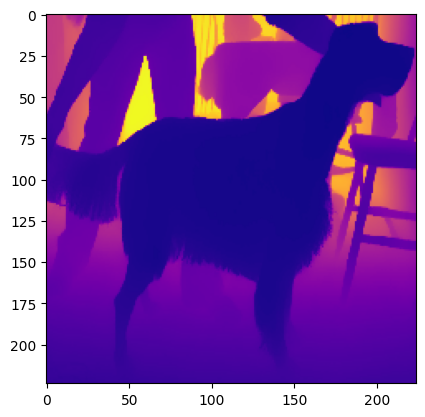

<Figure size 600x600 with 0 Axes>

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load 16-bit depth image
depth_16bit = cv2.imread('mini_dataset/001/ILSVRC2012_val_00000172.png', cv2.IMREAD_UNCHANGED)

# Step 2: Resize to 224×224 using nearest interpolation
resized_depth = cv2.resize(depth_16bit, (224, 224), interpolation=cv2.INTER_NEAREST)

# Step 3: Normalize to 8-bit
depth_8bit = cv2.normalize(resized_depth, None, 0, 255, cv2.NORM_MINMAX)
depth_8bit = depth_8bit.astype('uint8')

# Step 4: Apply perceptual colormap
colored = cv2.applyColorMap(depth_8bit, cv2.COLORMAP_PLASMA)
colored_rgb = cv2.cvtColor(colored, cv2.COLOR_BGR2RGB)

# Step 5: Plot
plt.imshow(colored_rgb)
plt.figure(figsize=(6, 6))
# plt.axis('off')
# plt.title('224x224 Depth Image with Colormap')
plt.show()


Take the `mini_dataset` (which contains 200 classes with 16-bit images), apply a perceptual colormap to each image, and save the resulting color-mapped images into a new folder.

In [ ]:
import numpy as np
import os

# Define the source and destination directories
source_base_folder = 'mini_dataset'
destination_base_folder = 'viridis_coloremapped_8bit_depth_images'

# Create the destination base directory if it doesn't exist
os.makedirs(destination_base_folder, exist_ok=True)

# Get the list of subfolders in the source directory
subfolders = [f.name for f in os.scandir(source_base_folder) if f.is_dir()]

# Process each subfolder
for subfolder_name in subfolders:
    source_subfolder_path = os.path.join(source_base_folder, subfolder_name)
    destination_subfolder_path = os.path.join(destination_base_folder, subfolder_name)

    # Create the corresponding subfolder in the destination
    os.makedirs(destination_subfolder_path, exist_ok=True)

    # Process each image in the current subfolder
    for image_name in os.listdir(source_subfolder_path):
        if image_name.endswith('.png'):
            source_image_path = os.path.join(source_subfolder_path, image_name)
            destination_image_path = os.path.join(destination_subfolder_path, image_name)

            try:
                # Step 1: Load 16-bit depth image
                depth_16bit = cv2.imread(source_image_path, cv2.IMREAD_UNCHANGED)

                # Check if the image was loaded successfully
                if depth_16bit is None:
                    print(f"Error loading image: {source_image_path}")
                    continue

                # Step 2: Resize to 224×224 using nearest interpolation
                resized_depth = cv2.resize(depth_16bit, (224, 224), interpolation=cv2.INTER_NEAREST)

                # Step 3: Normalize to 8-bit
                # Handle potential all-zero images
                if resized_depth.max() > 0:
                    depth_8bit = cv2.normalize(resized_depth, None, 0, 255, cv2.NORM_MINMAX)
                else:
                    depth_8bit = np.zeros_like(resized_depth, dtype='uint8') # Create an all-zero 8-bit image

                depth_8bit = depth_8bit.astype('uint8')

                # Step 4: Apply perceptual colormap
                colored = cv2.applyColorMap(depth_8bit, cv2.COLORMAP_VIRIDIS)

                # Step 5: Save the colormapped image
                cv2.imwrite(destination_image_path, colored)

            except Exception as e:
                print(f"Error processing image {source_image_path}: {e}")

print("Image processing and saving finished.")

Image processing and saving finished.


In `mini_resized_3channel_8bit_depth_images`, there are 200 subfolders with non-consecutive names ranging from `000` to `999`, as they were randomly selected from 1000 possible classes.  
These folder names are not continuous.  
The goal is to rename all 200 folders sequentially from `000` to `199` (using three-digit formatting with leading zeros), as deep learning models often prefer continuous, zero-based folder indices for class labels.

In [ ]:
import os

base_dir = 'viridis_coloremapped_8bit_depth_images'
# Get the list of current subdirectories (the original random names)
current_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Sort the directories if you want a consistent mapping
current_dirs.sort()

# Rename the directories sequentially
for i, old_dir_name in enumerate(current_dirs):
  new_dir_name = f'{i:03d}'  # Format as 3 digits with leading zeros
  old_path = os.path.join(base_dir, old_dir_name)
  new_path = os.path.join(base_dir, new_dir_name)
  os.rename(old_path, new_path)

print("Folders renamed successfully.")
!ls mini_resized_3channel_8bit_depth_images

Folders renamed successfully.
ls: cannot access 'mini_resized_3channel_8bit_depth_images': No such file or directory


In [ ]:
!zip -r viridis_coloremapped_8bit_depth_images.zip viridis_coloremapped_8bit_depth_images

Streaming output truncated to the last 5000 lines.
  adding: viridis_coloremapped_8bit_depth_images/182/ILSVRC2012_val_00042883.png (deflated 7%)
  adding: viridis_coloremapped_8bit_depth_images/182/ILSVRC2012_val_00016003.png (deflated 10%)
  adding: viridis_coloremapped_8bit_depth_images/037/ (stored 0%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00014284.png (deflated 8%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00036778.png (deflated 6%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00006455.png (deflated 10%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00028909.png (deflated 6%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00049217.png (deflated 6%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00024378.png (deflated 2%)
  adding: viridis_coloremapped_8bit_depth_images/037/ILSVRC2012_val_00037358.png (deflated 5%)
  adding: viridis_colorema

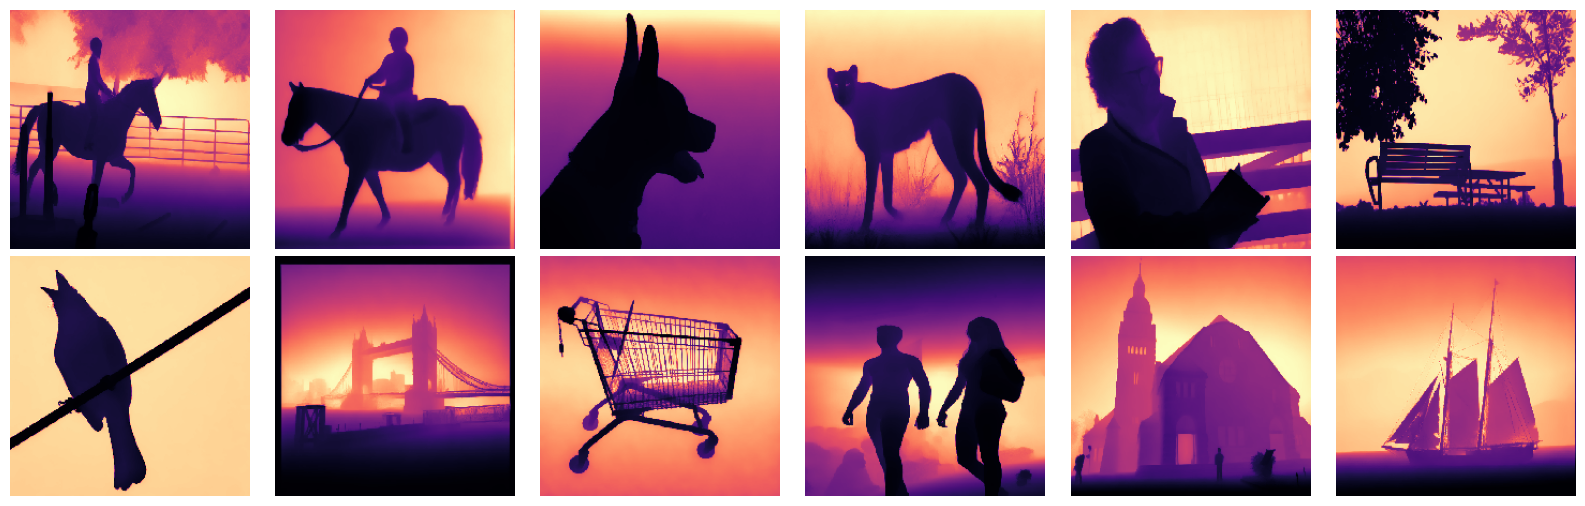

In [ ]:
images = ["006/ILSVRC2012_val_00042235.png", "006/ILSVRC2012_val_00019729.png", "012/ILSVRC2012_val_00010686.png", "013/ILSVRC2012_val_00021538.png",
          "055/ILSVRC2012_val_00009086.png", "055/ILSVRC2012_val_00018079.png", "076/ILSVRC2012_val_00006321.png", "135/ILSVRC2012_val_00011875.png",
          "190/ILSVRC2012_val_00000629.png", '196/ILSVRC2012_val_00015053.png', "187/ILSVRC2012_val_00008667.png", "039/ILSVRC2012_val_00007978.png"          ]
import matplotlib.pyplot as plt
num_cols, num_images = 6, len(images)
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(16, 2.5 * num_rows)) # Adjust figure size as needed

for i, img_path in enumerate(images):
    plt.subplot(num_rows, num_cols, i + 1)
    full_path = os.path.join('magama_coloremapped_8bit_depth_images', img_path)
    img = cv2.imread(full_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off') # Turn off axis
plt.tight_layout(pad=0.5) # Adjust layout to minimize space between images
plt.show()


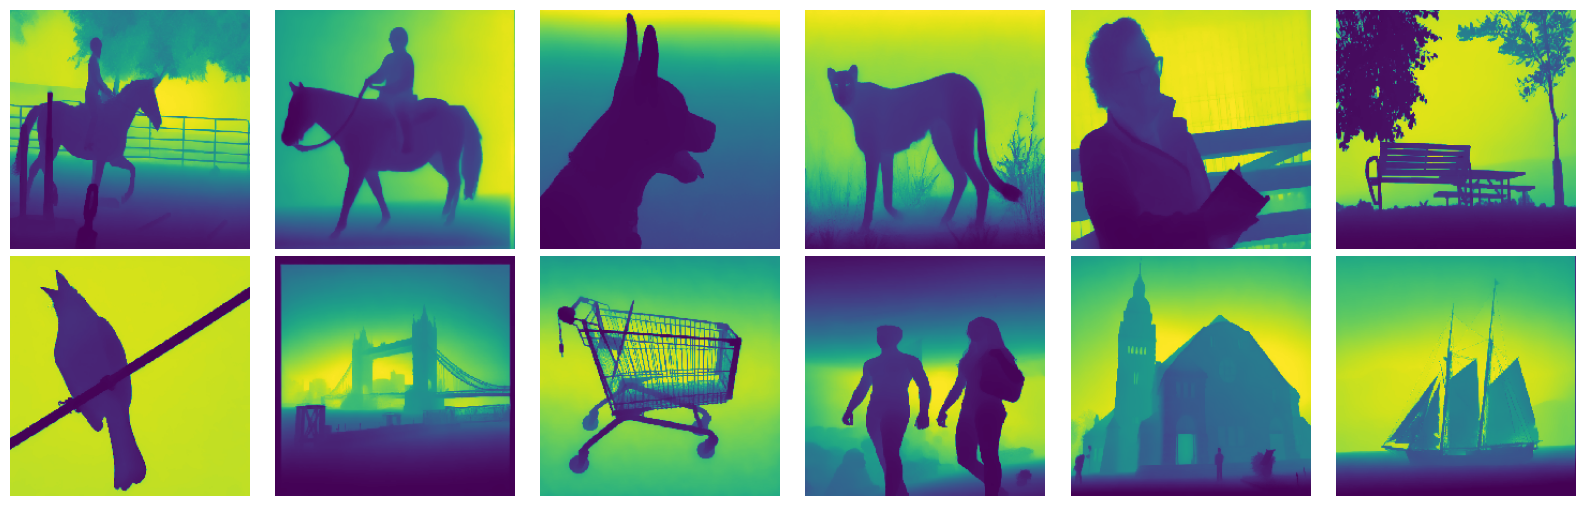

In [ ]:
images = ["006/ILSVRC2012_val_00042235.png", "006/ILSVRC2012_val_00019729.png", "012/ILSVRC2012_val_00010686.png", "013/ILSVRC2012_val_00021538.png",
          "055/ILSVRC2012_val_00009086.png", "055/ILSVRC2012_val_00018079.png", "076/ILSVRC2012_val_00006321.png", "135/ILSVRC2012_val_00011875.png",
          "190/ILSVRC2012_val_00000629.png", '196/ILSVRC2012_val_00015053.png', "187/ILSVRC2012_val_00008667.png", "039/ILSVRC2012_val_00007978.png"          ]
import matplotlib.pyplot as plt
num_cols, num_images = 6, len(images)
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(16, 2.5 * num_rows)) # Adjust figure size as needed

for i, img_path in enumerate(images):
    plt.subplot(num_rows, num_cols, i + 1)
    full_path = os.path.join('viridis_coloremapped_8bit_depth_images', img_path)
    img = cv2.imread(full_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off') # Turn off axis
plt.tight_layout(pad=0.5) # Adjust layout to minimize space between images
plt.show()


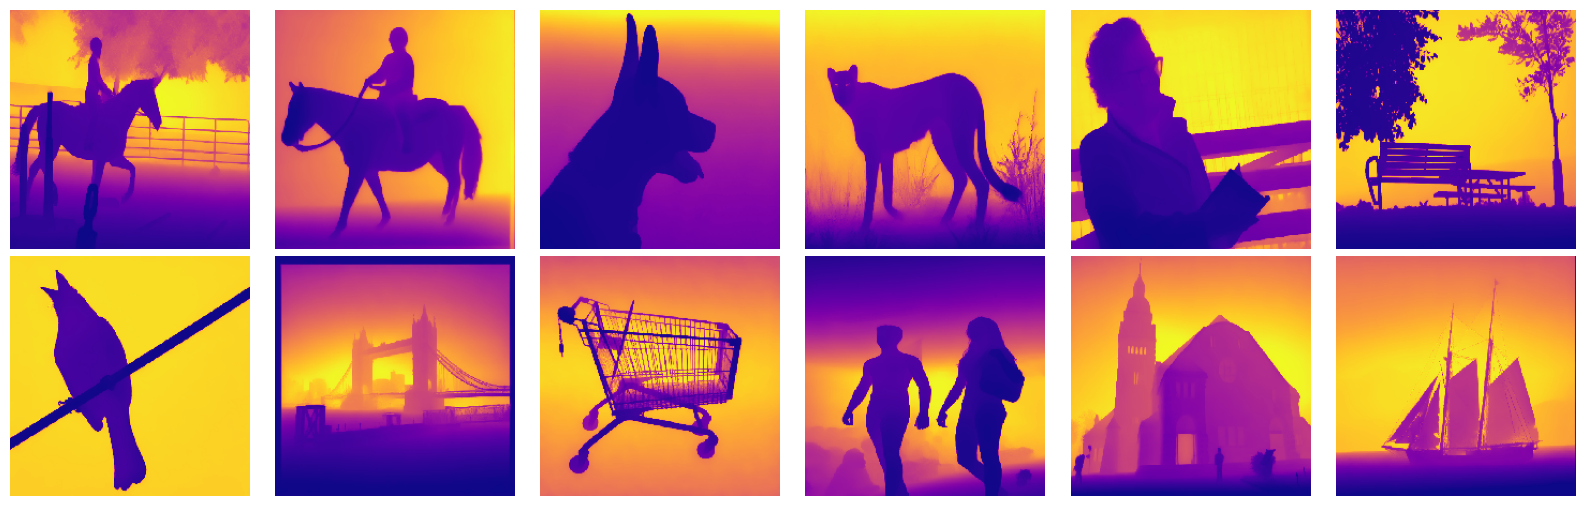

In [ ]:
images = ["006/ILSVRC2012_val_00042235.png", "006/ILSVRC2012_val_00019729.png", "012/ILSVRC2012_val_00010686.png", "013/ILSVRC2012_val_00021538.png",
          "055/ILSVRC2012_val_00009086.png", "055/ILSVRC2012_val_00018079.png", "076/ILSVRC2012_val_00006321.png", "135/ILSVRC2012_val_00011875.png",
          "190/ILSVRC2012_val_00000629.png", '196/ILSVRC2012_val_00015053.png', "187/ILSVRC2012_val_00008667.png", "039/ILSVRC2012_val_00007978.png"          ]
import matplotlib.pyplot as plt
num_cols, num_images = 6, len(images)
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(16, 2.5 * num_rows)) # Adjust figure size as needed

for i, img_path in enumerate(images):
    plt.subplot(num_rows, num_cols, i + 1)
    full_path = os.path.join('plasma_coloremapped_8bit_depth_images', img_path)
    img = cv2.imread(full_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off') # Turn off axis
plt.tight_layout(pad=0.5) # Adjust layout to minimize space between images
plt.show()
